In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df=pd.read_csv("Prakriti Analysis Dataset - data.csv")
df.head()

,SampleIdx,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,1,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Vata
1,2,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
2,3,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled,Vata
3,4,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,...,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
4,5,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Kapha


In [109]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df = pd.read_csv('Prakriti Analysis Dataset - data.csv')

#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df.head(25)

,SampleIdx,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,3,0,0,0,0,2,0,1,1,0,...,0,0,1,1,0,0,1,0,1,0
3,4,0,0,0,0,3,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4,5,0,1,1,0,0,1,2,0,0,...,0,0,1,0,0,1,1,1,0,1
5,6,0,2,1,0,0,2,1,0,0,...,0,0,0,0,0,0,1,1,0,2
6,7,0,1,1,0,0,1,2,1,1,...,0,0,0,0,0,1,0,0,0,1
7,8,0,2,2,1,2,2,1,0,0,...,0,0,0,0,0,1,1,1,0,2
8,9,0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
9,10,0,1,1,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
#The next step is to split our dataset into its attributes and labels
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [111]:
#train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

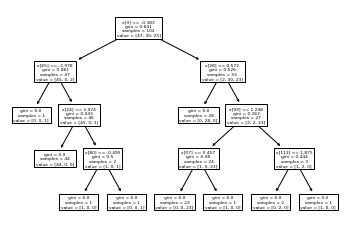

Accuracy: 0.8666666666666667


In [113]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
import sklearn.tree as tree
tree.plot_tree(classifier)
plt.show()
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

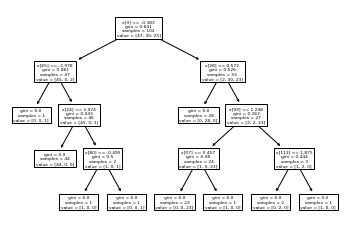

In [114]:
import sklearn.tree as tree
tree.plot_tree(classifier)
plt.show()

In [115]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8666666666666667


In [117]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs1 = SequentialFeatureSelector(classifier,n_features_to_select=5)
sfs1.fit(X,Y)
cols = sfs1.get_support(indices=True)
features_df_new = df.iloc[:,cols]
print(features_df_new)

     Gender  bodyFrame_Breadth  shoulder_Breadth  walking_style  skin_pimple
0         0                  0                 0              0            0
1         0                  1                 1              0            1
2         0                  0                 0              1            0
3         0                  0                 0              1            1
4         0                  1                 1              0            1
..      ...                ...               ...            ...          ...
142       1                  0                 0              1            1
143       1                  0                 2              2            1
144       1                  0                 0              1            1
145       1                  2                 2              2            1
146       1                  2                 2              2            1

[147 rows x 5 columns]


In [118]:
frames = [features_df_new,df["class"]]
result = pd.concat(frames,axis=1)
result

,Gender,bodyFrame_Breadth,shoulder_Breadth,walking_style,skin_pimple,class
0,0,0,0,0,0,0
1,0,1,1,0,1,1
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,1,1,0,1,1
...,...,...,...,...,...,...
142,1,0,0,1,1,0
143,1,0,2,2,1,0
144,1,0,0,1,1,0
145,1,2,2,2,1,0


In [119]:
#The next step is to split our dataset into its attributes and labels
X1=result.iloc[:,:-1]
Y1=result.iloc[:,-1]

In [120]:
#train/test split
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,train_size=0.70)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test=scaler.transform(X1_test)

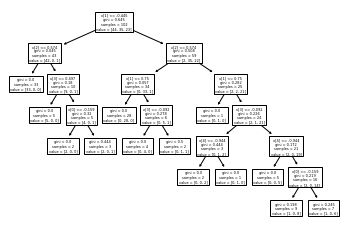

Accuracy: 0.9111111111111111


In [122]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier()
classifier1.fit(X1_train,Y1_train)
y1_pred=classifier1.predict(X1_test)
import sklearn.tree as tree
tree.plot_tree(classifier1)
plt.show()
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y1_test, y1_pred))

In [123]:
import pickle
data1={"model":classifier1}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data1,file)

In [125]:
with open('saved_steps.pkl','rb') as file:
    data1=pickle.load(file)
classifier_loaded=data1["model"]

In [130]:
values_to_test = np.array([[1,1,1,1,1]])
y_pred_new = classifier_loaded.predict(values_to_test)
y_pred_new

array([2])